# **Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Question 1**

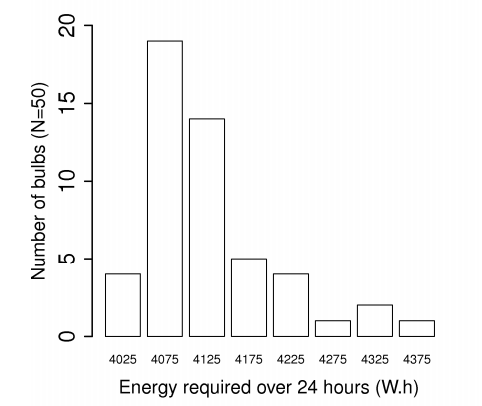

In [ ]:
a = np.array([4025, 4075, 4125, 4175, 4225, 4275, 4325, 4375 ])
b = np.array([4, 19, 14, 5, 4, 1, 2, 1])
sum_ =  np.array(b).sum()

mean = 0
for w, v in zip(b, a):
  mean += w*v/sum_ #using mean = sum(fi*xi)/sum(fi)
print("Sample Mean: ", mean)

#Sample Estimate
var_sample = 0
for vals, weis in zip(a, b): #using variance = sum{fi*[(xi-mean)^2]}/(n-1)
   var_sample += (weis/(sum_-1))*((vals-mean)**2)
print("Sample Standard Deviation: ", np.sqrt(var_sample)) #using std. dev = sqrt(variance)

#Estimating by assuming it as population
var_pop = np.average((a - mean)**2, weights=b) #using variance = sum{fi*[(xi-mean)^2]}/n
print("\nIf this distribution itself is taken to be the population:\nStandard Deviation (Population): ", np.sqrt(var_pop)) #using std. dev = sqrt(variance)

Sample Mean:  4127.0
Sample Standard Deviation:  78.86956423909864

If this distribution itself is taken to be the population:
Standard Deviation (Population):  78.07688518377255


#**Question 2**

In [ ]:
ammonia = pd.read_csv('/content/ammonia.csv')
ammonia.head()

,Ammonia
0,35.00
1,40.66
2,41.05
3,32.29
4,35.59


**Part (a)**

Separate plots for the normal distribution curve and the histogram.

In the normal density plot, the density of distribution has been plotted on the y axis rather than just frequencies.

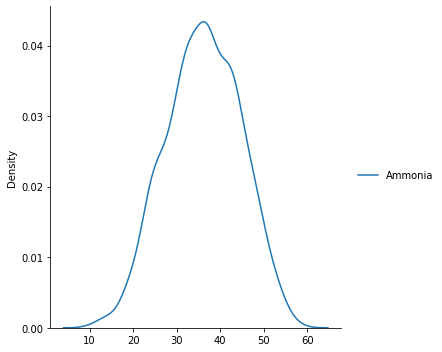

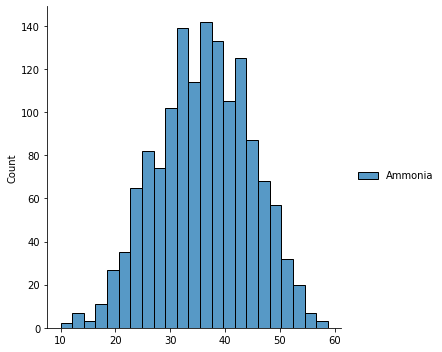

In [ ]:
sns.displot(ammonia, kind="kde") #For Distribution
sns.displot(ammonia) #For Histogram

Combining these two, and using the density on the y-axis (normalized frequency)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


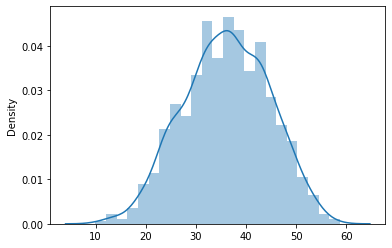

In [ ]:
sns.distplot(ammonia)

**Part (b)**

In [ ]:
ammonia.describe() # A quick description of the 1D dataset 

,Ammonia
count,1440.000000
mean,36.094993
std,8.518928
min,9.990000
25%,30.225000
50%,36.180000
75%,42.370000
max,58.740000


The above part describes the spread of the distribution with the mean = 36.095 and a standard deviation = 8.51. The min and max values as can be seen are 9.99 and 58.74 respectively. From the plot, it can be said that the distribution is not skewed and hence the mean and standard deviation are enough to describe the distribution and its spread.

# **Question 3**

In [ ]:
co2 = pd.read_csv('/content/gas-furnace.csv')
co2.head()

,InputGasRate,CO2
0,-0.109,53.8
1,0.000,53.6
2,0.178,53.5
3,0.339,53.5
4,0.373,53.4


**Part (a)**

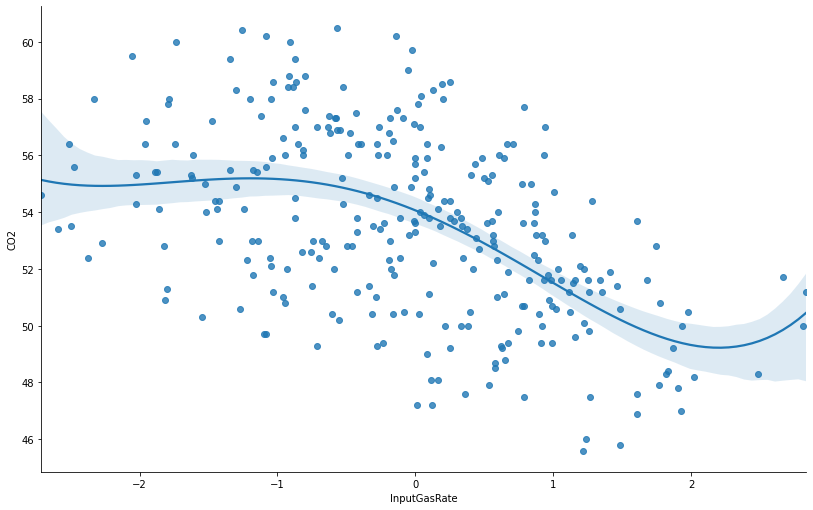

In [ ]:
sns.lmplot(x='InputGasRate', y='CO2', data=co2, order=4, height=7, aspect=1.6) # Fitting a 4th order curve over the scatter data along with the spread to observe relationship

From the scatter plot and the fitted 4th order polynomial and also measuring the spread or variance along that fit, it can be said that CO2 measurement decreases with the increase in input gas flow rate.

**Part (b)**

Correlation Value: -0.48445071710938603 

Variance: 
For Gas Rate:  1.1508258267407232
For CO2:  10.253577530920744


Covariance:  -1.6641486337608786




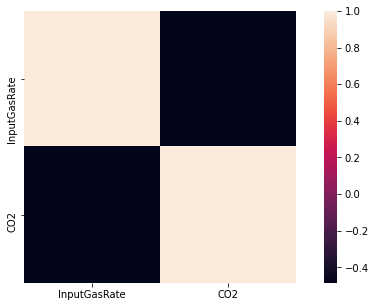

In [ ]:
fig, ax = plt.subplots(figsize=[10,5]) 
sns.heatmap(co2.corr(), square=True, ax=ax)
print("Correlation Value: {} \n".format(co2.corr()['InputGasRate'][1]))

print("Variance: ")
print("For Gas Rate: ",co2.InputGasRate.var())
print("For CO2: ",co2.CO2.var())
print("\n")
cov_mat = co2.cov()
print("Covariance: ", cov_mat['InputGasRate'][1])
print("\n")

It gives a correlation value of -0.48 and can be considered as a mild to reasonably strong correlation between the input gas flow rate and the CO2 measurement, supporting the inference from the scatter plot.

**Part (c)**

In [ ]:
Y = co2['CO2']
X = co2['InputGasRate']
X = sm.add_constant(X) #Adds a constant term for intercept

model = sm.OLS(Y,X) #Simple OLS model
results = model.fit() #Fitting the model over the data
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     90.16
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           7.97e-19
Time:                        10:29:50   Log-Likelihood:                -724.41
No. Observations:                 296   AIC:                             1453.
Df Residuals:                     294   BIC:                             1460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           53.4269      0.163    327.116   

Linear Model: 

Y: CO2 Measurement

X: Input Gas Flow Rate
> **Y = 53.427 - 1.446 * X**






# **Question 4**

**Part (c)** - Interaction Plots

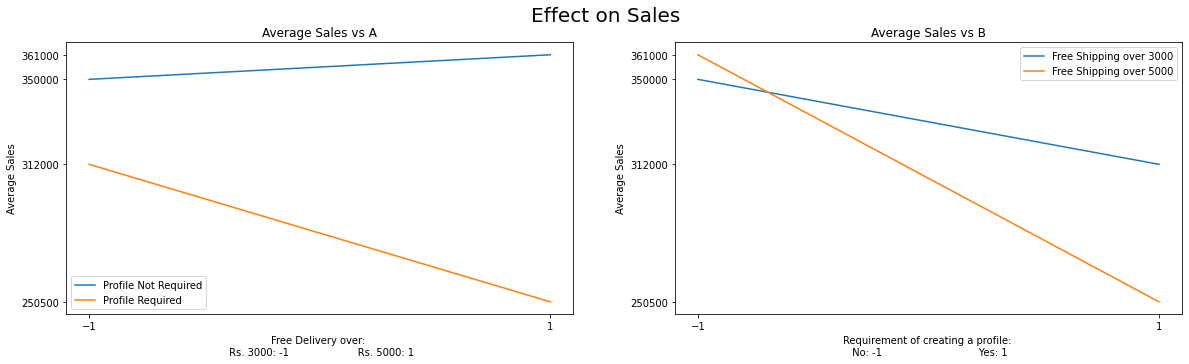

In [ ]:
f, ax = plt.subplots(nrows=1,ncols=2, figsize=[20,5])
f.suptitle("Effect on Sales", fontsize=20)
plt.sca(ax[0]); #Setting current axes to 0 (for the left subplot)
plt.plot([-1,1],[350000,361000])
plt.plot([-1,1],[312000,250500])
plt.legend(["Profile Not Required", "Profile Required"])
plt.xlabel("Free Delivery over: \n Rs. 3000: -1                      Rs. 5000: 1")
plt.xticks([-1,1])
plt.ylabel("Average Sales")
plt.yticks([350000,361000,312000,250500])
plt.title("Average Sales vs A")
plt.sca(ax[1]); #Setting current axes to 1 (for the right subplot)
plt.plot([-1,1],[350000,312000])
plt.plot([-1,1],[361000,250500])
plt.legend(["Free Shipping over 3000", "Free Shipping over 5000"])
plt.xlabel("Requirement of creating a profile: \n No: -1                               Yes: 1")
plt.xticks([-1,1])
plt.ylabel("Average Sales")
plt.yticks([350000,361000,312000,250500])
plt.title("Average Sales vs B")
plt.show()

**Part (e)** - Least Square Model

In [ ]:
mat_A4  = np.matrix([
                    [1,-1,-1, 1],
                    [1, 1,-1,-1],
                    [1,-1, 1,-1],
                    [1, 1, 1, 1]
                    ])
mat_b4 = np.matrix([[350000], [361000], [312000], [250500]])
c_val = (linalg.inv(mat_A4)*mat_b4).flatten().tolist()[0] # using inverse_A*B and flattening the resultant matrix to a 1D list
print("Main effects: \n A: {}  B: {} \n\nInteractions: \n A*B: {} ".format(c_val[1], c_val[2], c_val[3]))

print("\nLinear Model:\n Y = {}  +  {}*XA  + {}*XB  +  {}*XA*XB".format(c_val[0], c_val[1], c_val[2], c_val[3]))

Main effects: 
 A: -12625.0  B: -37125.0 

Interactions: 
 A*B: -18125.0 

Linear Model:
 Y = 318375.0  +  -12625.0*XA  + -37125.0*XB  +  -18125.0*XA*XB


#**Quesion 5**

**Part (a) and Part (b)**

Using the Least Squares Method, we can directly estimate the Main effects and the interactions

In [ ]:
mat_A  = np.matrix([
                    [1,-1,-1,-1, 1, 1, 1,-1],
                    [1, 1,-1,-1,-1, 1,-1, 1],
                    [1,-1, 1,-1,-1,-1, 1, 1],
                    [1, 1, 1,-1, 1,-1,-1,-1],
                    [1,-1,-1, 1, 1,-1,-1, 1],
                    [1, 1,-1, 1,-1,-1, 1,-1],
                    [1,-1, 1, 1,-1, 1,-1,-1],
                    [1, 1, 1, 1, 1, 1, 1, 1]
                    ])
mat_b = np.matrix([[72], [73], [66], [87], [70], [73], [67], [87]])

coeff = linalg.inv(mat_A)*mat_b
coeff = coeff.flatten().tolist()[0]

print("Main effects: \nA: {}\nB: {}\nC: {} \n\nInteractions: \nA*B: {}\nB*C: {}\nA*C: {}\nA*B*C: {}\n\n".format(coeff[1], coeff[2], coeff[3],
                                                                                                                coeff[4], coeff[5], coeff[5],
                                                                                                                coeff[7]))

print("Linear Model:\nY = {} + {}*XA + {}*XB + {}*XC + {}*XA*XB + {}*XB*XC + {}*XA*XC + {}*XA*XB*XC".format(coeff[0], coeff[1], coeff[2],
                                                                                                                coeff[3], coeff[4], coeff[5],
                                                                                                                coeff[6], coeff[7]))

Main effects: 
A: 5.625
B: 2.375
C: -0.125 

Interactions: 
A*B: 4.625
B*C: 0.375
A*C: 0.375
A*B*C: -0.375


Linear Model:
Y = 74.375 + 5.625*XA + 2.375*XB + -0.125*XC + 4.625*XA*XB + 0.375*XB*XC + 0.125*XA*XC + -0.375*XA*XB*XC


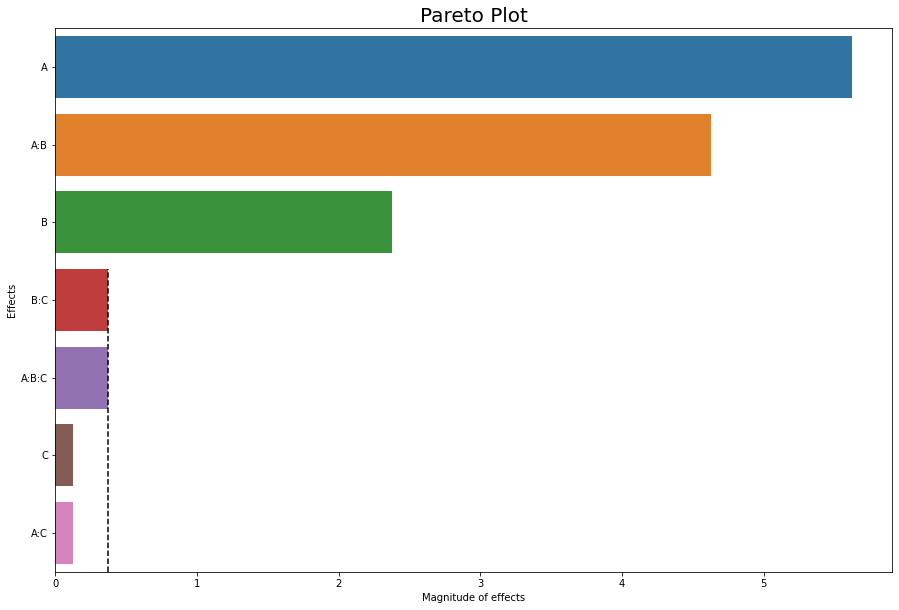

In [ ]:
xval = np.array(coeff)
xval_ab = np.abs(xval[1:])
y_val = ['A', 'B', 'C', 'A:B', 'B:C', 'A:C', 'A:B:C']

data = pd.DataFrame(list(zip(xval_ab, y_val)), columns=['Magnitude of effects', 'Effects'])
data.sort_values(by='Magnitude of effects', inplace=True, ascending=False)

fig,ax = plt.subplots(figsize=[15,10])
sns.barplot(x=data['Magnitude of effects'], y=data['Effects'], ax=ax)
ax.set_title('Pareto Plot', fontsize=20)
ax.axvline(0.375, ymax=0.557, color='k', linestyle='--')

The pareto plot was not scaled by dividing with average because the values are still comparable. As we can see, the main effect of C is negligible as compared to A and B, and even less than the interaction of A and B. The A:B interaction comes out to be even stronger than the B's main effect.

By taking into account the above plot, and considering the threshold at 0.375. The relationship and hence the linear model will be modified to the given form

In [ ]:
vals = data["Magnitude of effects"].values.tolist()
print("Linear Model:\nY = {} + {}*XA + {}*XB + {}*XA*XB".format(coeff[0], vals[0], vals[2], vals[1]))

Linear Model:
Y = 74.375 + 5.625*XA + 2.375*XB + 4.625*XA*XB


#**Question 6**

In [21]:
food_tex = pd.read_csv('/content/food-texture.csv', index_col=None)
food_tex.head()

,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


In [22]:
features = ['Oil','Density','Crispy','Fracture','Hardness'] # Variable Names
x = food_tex.loc[:, features].values
x = StandardScaler().fit_transform(x) # Scaling the values (Standard Normalization)

pca = PCA(n_components=5) # Number of components to decompose into
pc = pca.fit_transform(x) # Fitting a PCA model to the values 

principalDf = pd.DataFrame(data = pc, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principalDf.head() # Transformed principal components (first 5 values)

,PC1,PC2,PC3,PC4,PC5
0,1.397254,0.625695,0.406598,-0.491750,0.006009
1,-2.822848,-0.357316,1.086951,0.258398,0.493736
2,-0.239968,-0.870204,0.617757,0.029822,0.178113
3,1.959030,1.153328,-0.442393,0.315704,-0.559647
4,1.280810,-0.670200,-0.441604,0.072634,-0.407546


In [23]:
print("Percentage of Variance explained by:\n")
for i in range(5):
  print("PC{} : {}\n".format(i+1, pca.explained_variance_ratio_[i]))

Percentage of Variance explained by:

PC1 : 0.6062426334584962

PC2 : 0.2591411527599621

PC3 : 0.062009868337747555

PC4 : 0.048384016320340034

PC5 : 0.02422232912345399



In [24]:
print("PC1 and PC2 together explain {} % of variance".format((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100))

PC1 and PC2 together explain 86.53837862184582 % of variance


In [25]:
#Gives the 2nd norm of the principal components, gives the estimates of the PCs
print("The second norm of the principal components:\n")
for i in range(5):
  print("PC{} : {}\n".format(i+1, pca.singular_values_[i]))

The second norm of the principal components:

PC1 : 12.310997456121255

PC2 : 8.048930872481792

PC3 : 3.9373172445761697

PC4 : 3.4779310056533617

PC5 : 2.4608092735649985



In [26]:
cor_val = food_tex[features].corr()
w, v = linalg.eig(cor_val)
print("Eigen Values\n", w)
print("\n")
print("Eigen Vector\n", v)

Eigen Values
 [3.03121317 1.29570576 0.31004934 0.24192008 0.12111165]


Eigen Vector
 [[-0.45753343  0.37043885 -0.6590302   0.46794489 -0.01204121]
 [ 0.4787455  -0.35674997 -0.01623973  0.71846318 -0.35648161]
 [-0.53238767 -0.19766103  0.17888443 -0.13252692 -0.79242064]
 [ 0.50447688  0.22123992 -0.54227938 -0.45693168 -0.44011646]
 [-0.15340262 -0.8046661  -0.48923298 -0.19618432  0.22614798]]


In [27]:
# In terms of the input features
print("PC1 = {}*X1 + {}*X2 + {}*X3 + {}*X4 + {}*X5".format(v[0][0],v[1][0],v[2][0],v[3][0],v[4][0]))
print("PC2 = {}*X1 + {}*X2 + {}*X3 + {}*X4 + {}*X5".format(v[0][1],v[1][1],v[2][1],v[3][1],v[4][1]))

PC1 = -0.45753342980017714*X1 + 0.47874549819235396*X2 + -0.5323876656156658*X3 + 0.5044768772111712*X4 + -0.15340261547772968*X5
PC2 = 0.3704388527281684*X1 + -0.35674996728774866*X2 + -0.1976610269438442*X3 + 0.22123991685699063*X4 + -0.8046661014646047*X5
